# Exploratory Data Analysis (EDA)
This notebook performs comprehensive exploratory data analysis on the credit risk dataset.   

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)


## 1. Data Overview

In [2]:
# Load the transaction data
df = pd.read_csv('../data/raw/data.csv')
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (95662, 16)


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [3]:
print("=== DATASET OVERVIEW ===")
print(f"Rows: {df.shape[0]:,}")
print(f"Columns: {df.shape[1]}")
print("\n=== DATA TYPES ===")
df.info()

=== DATASET OVERVIEW ===
Rows: 95,662
Columns: 16

=== DATA TYPES ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  

## 2. Summary Statistics

In [4]:
print("=== NUMERICAL FEATURES SUMMARY ===")
df.describe().T

=== NUMERICAL FEATURES SUMMARY ===


,count,mean,std,min,25%,50%,75%,max
CountryCode,95662.0,256.000000,0.000000,256.0,256.0,256.0,256.0,256.0
Amount,95662.0,6717.846433,123306.797164,-1000000.0,-50.0,1000.0,2800.0,9880000.0
Value,95662.0,9900.583941,123122.087776,2.0,275.0,1000.0,5000.0,9880000.0
PricingStrategy,95662.0,2.255974,0.732924,0.0,2.0,2.0,2.0,4.0
FraudResult,95662.0,0.002018,0.044872,0.0,0.0,0.0,0.0,1.0


In [5]:
print("=== CATEGORICAL FEATURES SUMMARY ===")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts().head())

=== CATEGORICAL FEATURES SUMMARY ===

TransactionId:
TransactionId
TransactionId_76871    1
TransactionId_73770    1
TransactionId_26203    1
TransactionId_380      1
TransactionId_28195    1
Name: count, dtype: int64

BatchId:
BatchId
BatchId_67019     28
BatchId_51870     16
BatchId_113893    14
BatchId_127204    12
BatchId_116835    10
Name: count, dtype: int64

AccountId:
AccountId
AccountId_4841    30893
AccountId_4249     4457
AccountId_4840     1738
AccountId_3206     1105
AccountId_318      1070
Name: count, dtype: int64

SubscriptionId:
SubscriptionId
SubscriptionId_3829    32630
SubscriptionId_4429     4457
SubscriptionId_1372     1105
SubscriptionId_3087     1070
SubscriptionId_4346      965
Name: count, dtype: int64

CustomerId:
CustomerId
CustomerId_7343    4091
CustomerId_3634    2085
CustomerId_647     1869
CustomerId_1096     784
CustomerId_4033     778
Name: count, dtype: int64

CurrencyCode:
CurrencyCode
UGX    95662
Name: count, dtype: int64

ProviderId:
ProviderId
P

## 3. Distribution Analysis

Numerical columns: ['Amount', 'Value', 'PricingStrategy', 'FraudResult']


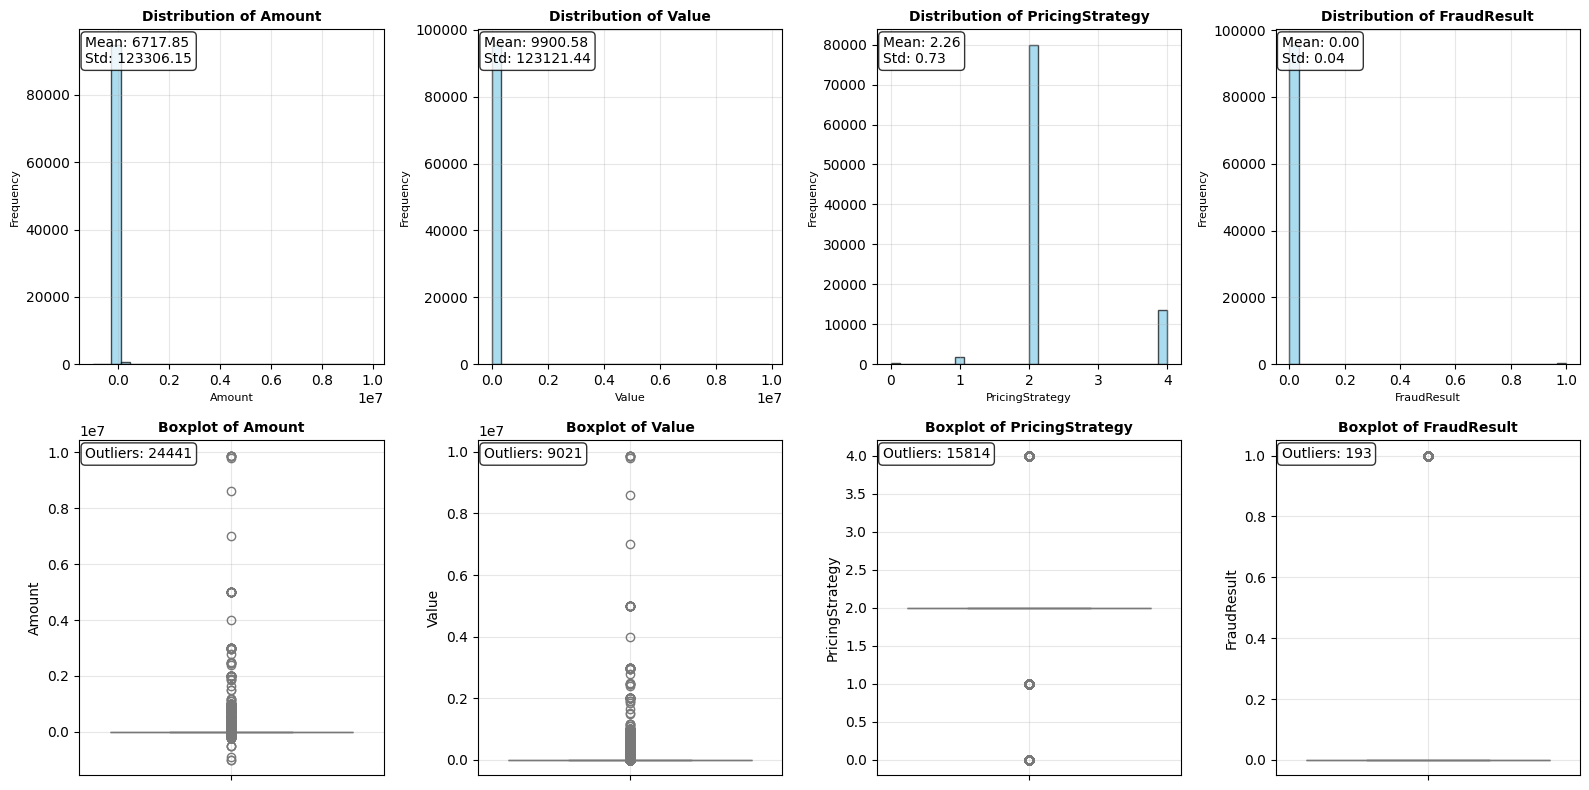

In [6]:
# Combined optimized visualizations
numerical_cols = ['Amount', 'Value', 'PricingStrategy', 'FraudResult']
print(f"Numerical columns: {numerical_cols}")

# Create figure with 2 rows: histograms and boxplots
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# Row 1: Histograms
for i, col in enumerate(numerical_cols):
    values = df[col].values
    axes[0, i].hist(values, bins=30, alpha=0.7, edgecolor='black', color='skyblue')
    axes[0, i].set_title(f'Distribution of {col}', fontsize=10, fontweight='bold')
    axes[0, i].set_xlabel(col, fontsize=8)
    axes[0, i].set_ylabel('Frequency', fontsize=8)
    axes[0, i].grid(True, alpha=0.3)
    
    # Add statistics
    mean_val = values.mean()
    std_val = values.std()
    axes[0, i].text(0.02, 0.98, f'Mean: {mean_val:.2f}\nStd: {std_val:.2f}', 
                    transform=axes[0, i].transAxes, verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Row 2: Boxplots
for i, col in enumerate(numerical_cols):
    sns.boxplot(data=df, y=col, ax=axes[1, i], color='lightblue')
    axes[1, i].set_title(f'Boxplot of {col}', fontsize=10, fontweight='bold')
    axes[1, i].grid(True, alpha=0.3)
    
    # Add outlier count
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()
    axes[1, i].text(0.02, 0.98, f'Outliers: {outliers}', 
                    transform=axes[1, i].transAxes, verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

## 4. Categorical Analysis

Categorical columns: ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'TransactionStartTime']


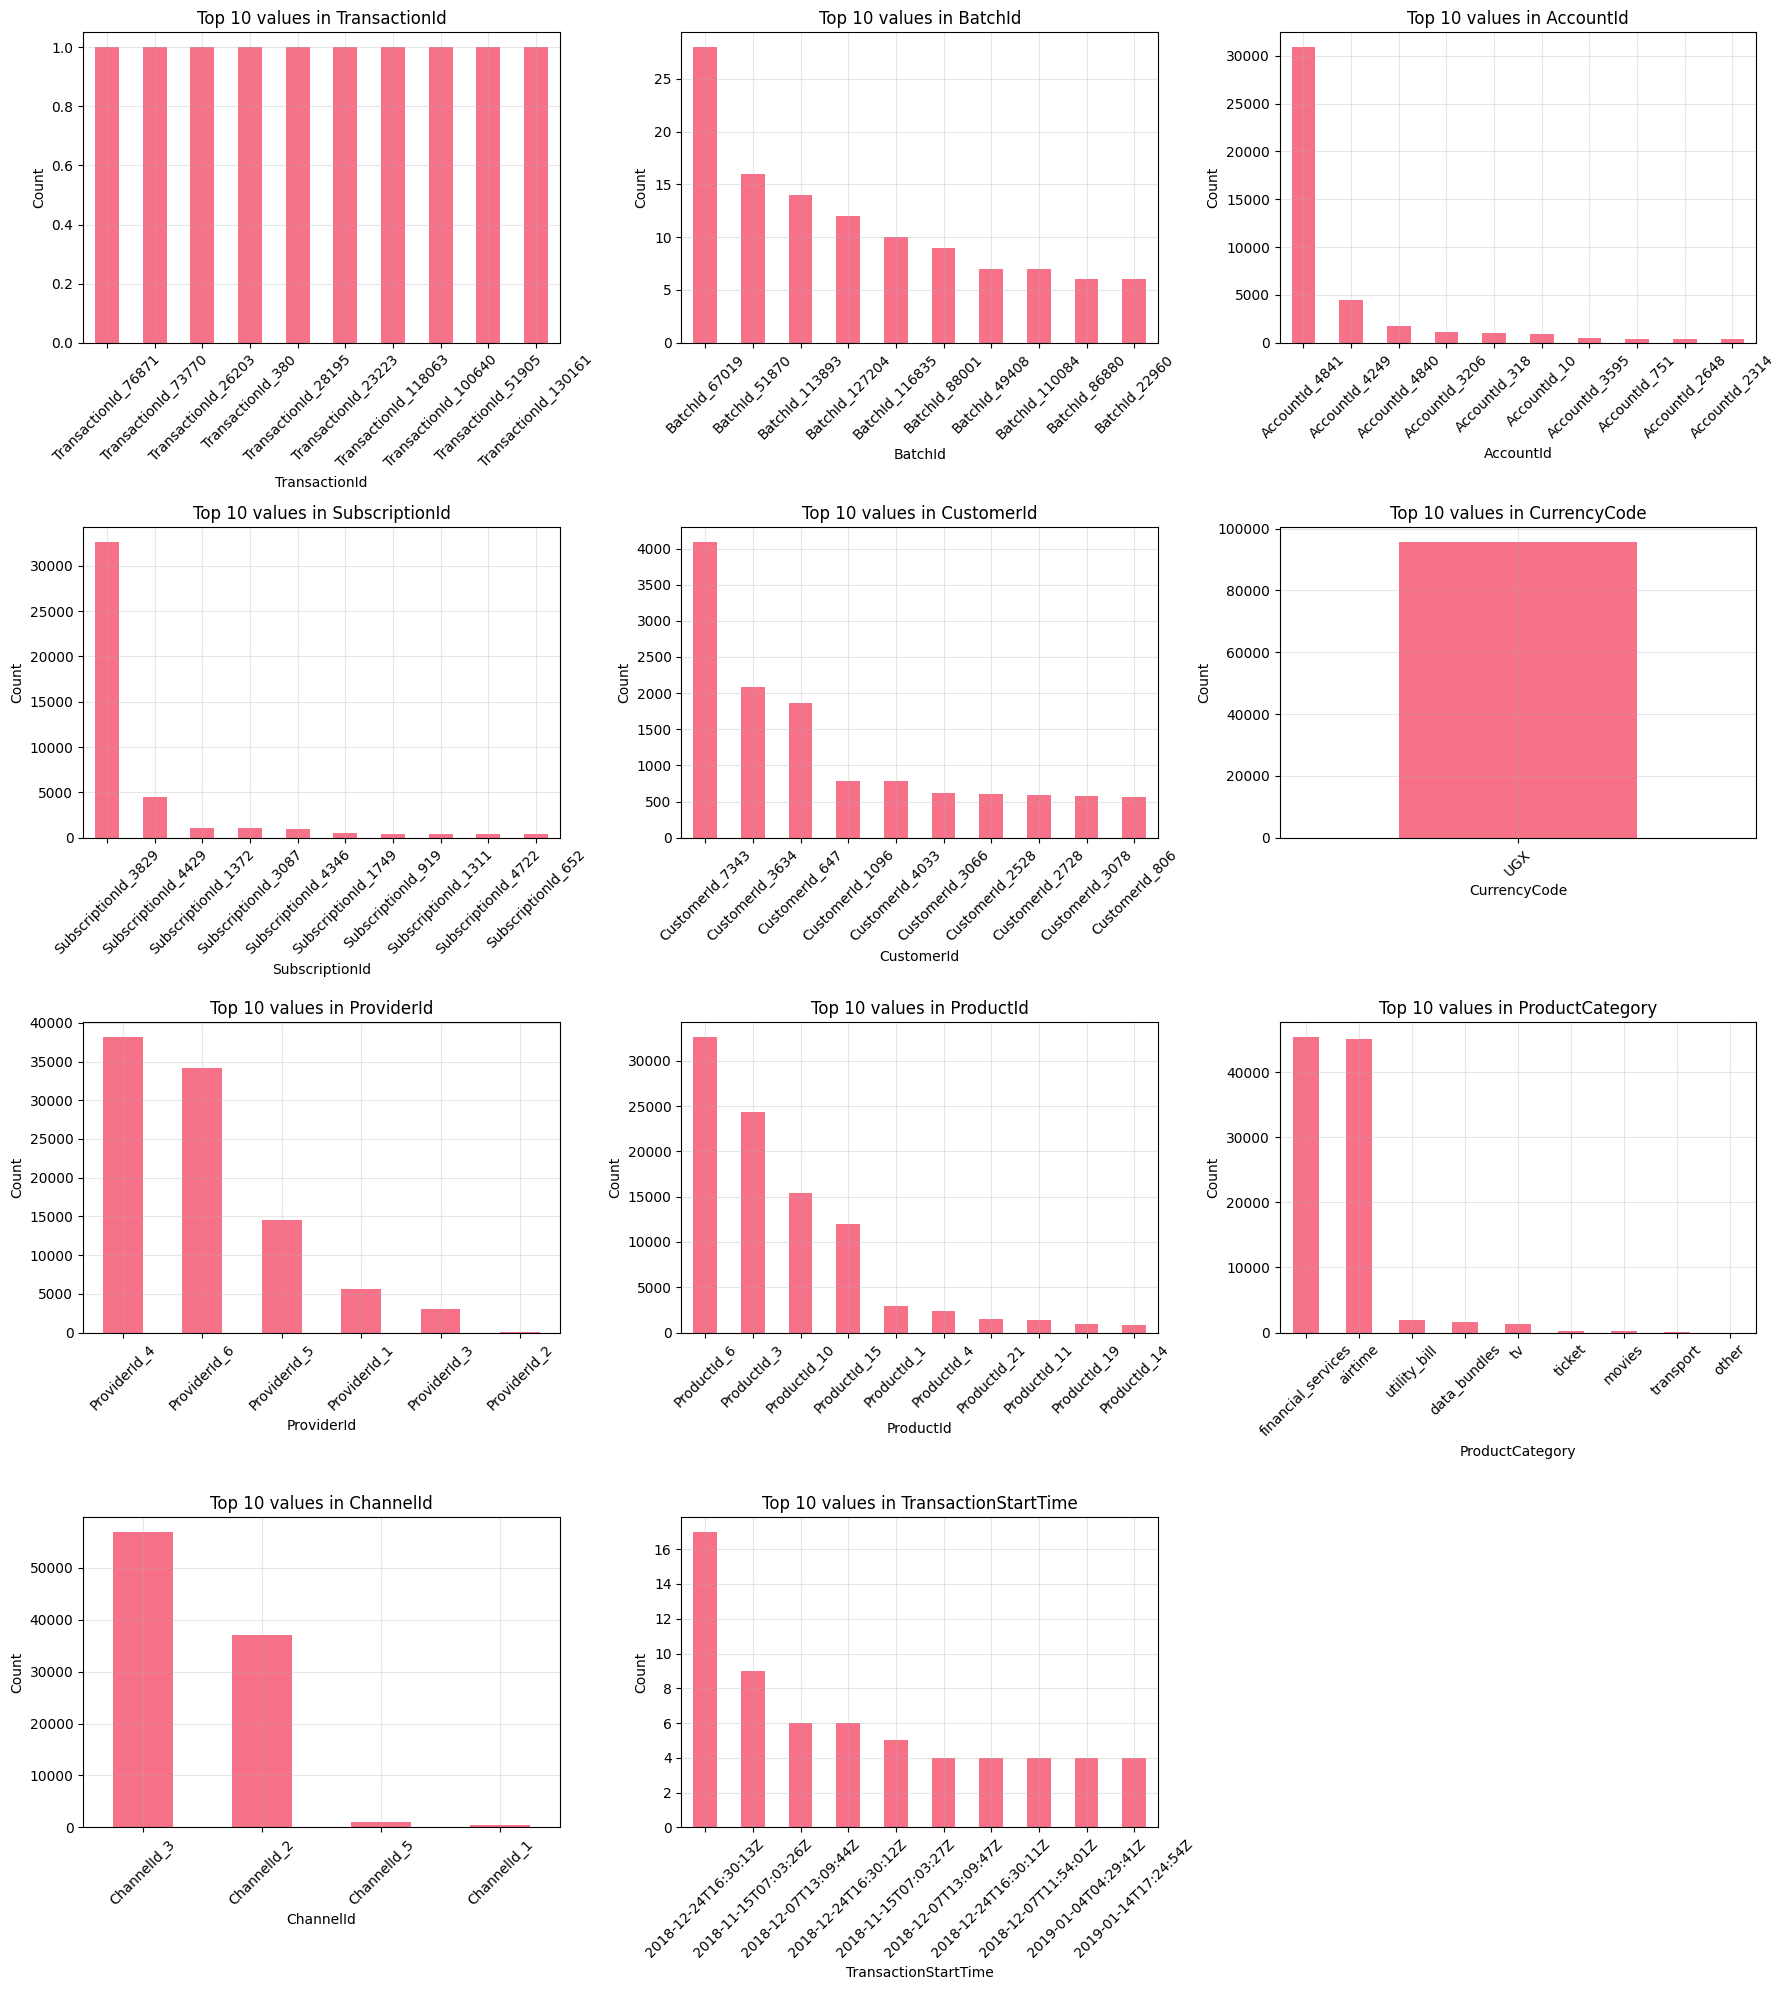

In [7]:
print(f"Categorical columns: {list(categorical_cols)}")

# Create subplots for categorical features
n_cat_cols = len(categorical_cols)
n_cat_rows = (n_cat_cols + 2) // 3

fig, axes = plt.subplots(n_cat_rows, 3, figsize=(18, 5*n_cat_rows))
axes = axes.ravel()

for i, col in enumerate(categorical_cols):
    value_counts = df[col].value_counts().head(10)
    value_counts.plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Top 10 values in {col}', fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True, alpha=0.3)

# Hide empty subplots
for i in range(len(categorical_cols), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

## 5. Correlation Analysis

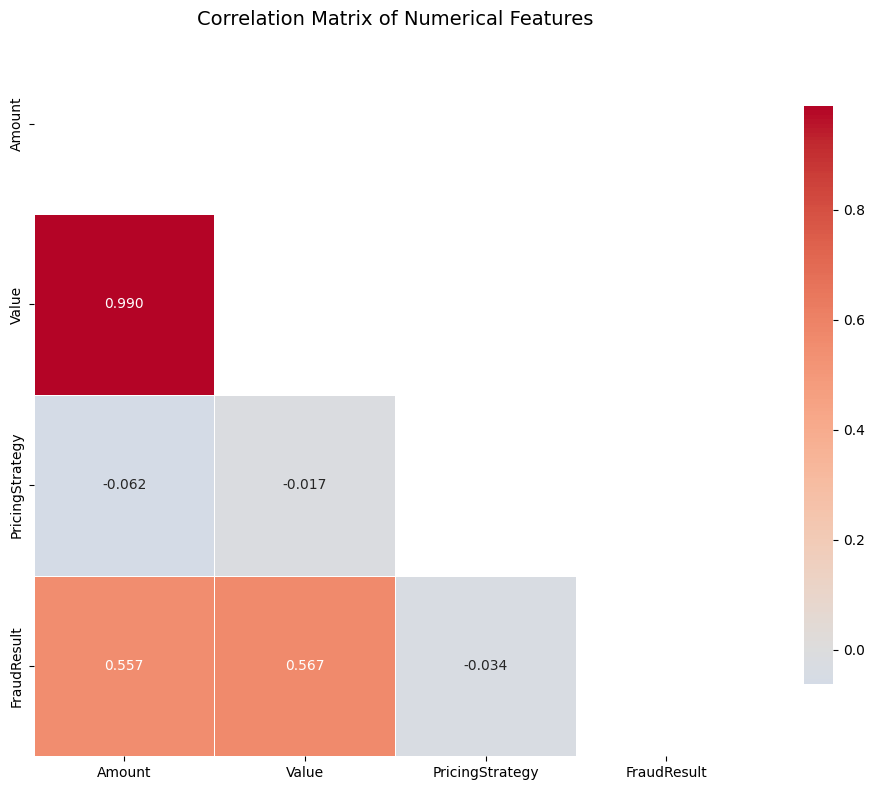

In [8]:
# Correlation matrix for numerical features
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', 
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": .8}, fmt='.3f')
plt.title('Correlation Matrix of Numerical Features', fontsize=14)
plt.tight_layout()
plt.show()

In [9]:
# Find highly correlated features
threshold = 0.7
high_corr = np.where(np.abs(correlation_matrix) > threshold)
high_corr = [(correlation_matrix.index[x], correlation_matrix.columns[y], correlation_matrix.iloc[x, y]) 
             for x, y in zip(*high_corr) if x != y and x < y]

print(f"\nHighly correlated feature pairs (|correlation| > {threshold}):")
if high_corr:
    for feat1, feat2, corr in high_corr:
        print(f"{feat1} - {feat2}: {corr:.3f}")
else:
    print("No highly correlated features found.")


Highly correlated feature pairs (|correlation| > 0.7):
Amount - Value: 0.990


## 6. Missing Values Analysis

In [10]:
# Missing values analysis
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percentage
}).sort_values('Missing Count', ascending=False)

print("=== MISSING VALUES SUMMARY ===")
missing_values_found = missing_df[missing_df['Missing Count'] > 0]
if len(missing_values_found) > 0:
    print(missing_values_found)
else:
    print("✅ No missing values found in the dataset!")

=== MISSING VALUES SUMMARY ===
✅ No missing values found in the dataset!


## 7. Outlier Detection

In [11]:
# IQR method for outlier detection
outlier_summary = {}

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    outlier_percentage = (outliers / len(df)) * 100
    
    outlier_summary[col] = {
        'Outlier Count': outliers,
        'Outlier Percentage': outlier_percentage,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound
    }

outlier_df = pd.DataFrame(outlier_summary).T
print("=== OUTLIER DETECTION SUMMARY (IQR Method) ===")
print(outlier_df.sort_values('Outlier Count', ascending=False))

=== OUTLIER DETECTION SUMMARY (IQR Method) ===
                 Outlier Count  Outlier Percentage  Lower Bound  Upper Bound
Amount                 24441.0           25.549330      -4325.0       7075.0
PricingStrategy        15814.0           16.531120          2.0          2.0
Value                   9021.0            9.430077      -6812.5      12087.5
FraudResult              193.0            0.201752          0.0          0.0


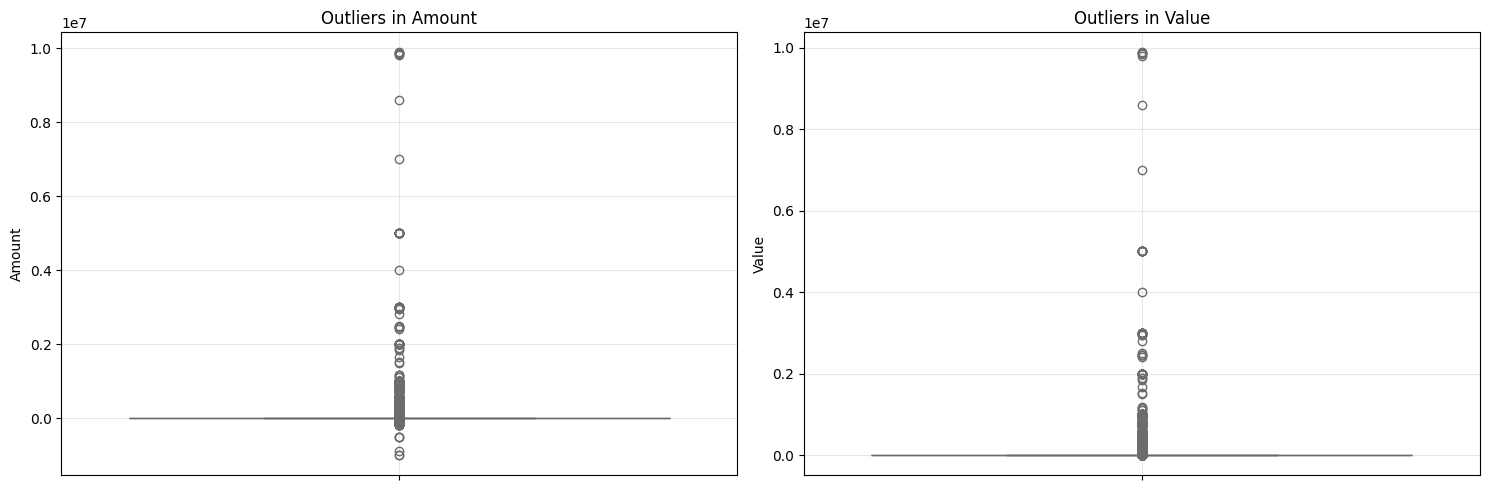

In [12]:
# Visualize outliers for key numerical features
key_features = ['Amount', 'Value']
fig, axes = plt.subplots(1, len(key_features), figsize=(15, 5))

for i, col in enumerate(key_features):
    if col in df.columns:
        sns.boxplot(data=df, y=col, ax=axes[i])
        axes[i].set_title(f'Outliers in {col}')
        axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 8. Time Series Analysis

Time-related columns: ['TransactionStartTime']


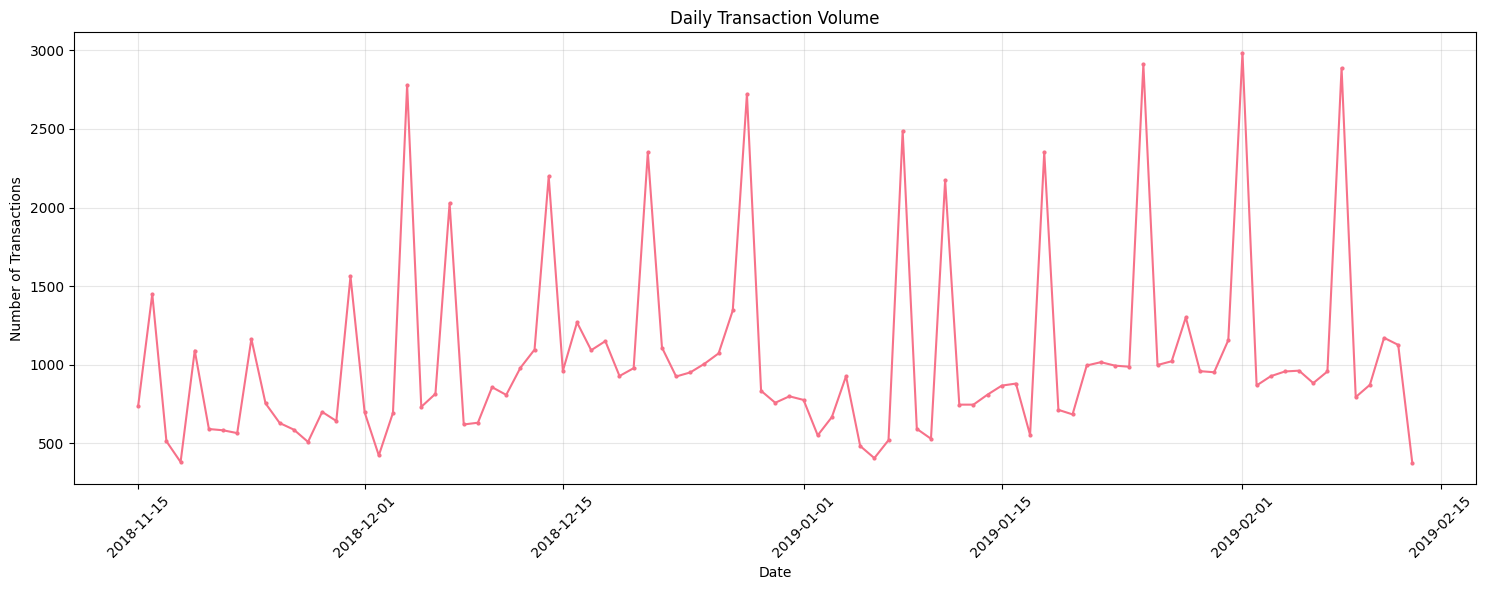

In [13]:
# Check if we have time-based columns
time_columns = [col for col in df.columns if 'time' in col.lower() or 'date' in col.lower()]
print(f"Time-related columns: {time_columns}")

if 'TransactionStartTime' in df.columns:
    # Convert to datetime
    df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])
    
    # Extract date components
    df['TransactionDate'] = df['TransactionStartTime'].dt.date
    df['TransactionHour'] = df['TransactionStartTime'].dt.hour
    df['TransactionDay'] = df['TransactionStartTime'].dt.day_name()
    
    # Transaction volume over time
    daily_transactions = df.groupby('TransactionDate').size()
    
    plt.figure(figsize=(15, 6))
    daily_transactions.plot(kind='line', marker='o', markersize=2)
    plt.title('Daily Transaction Volume')
    plt.xlabel('Date')
    plt.ylabel('Number of Transactions')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

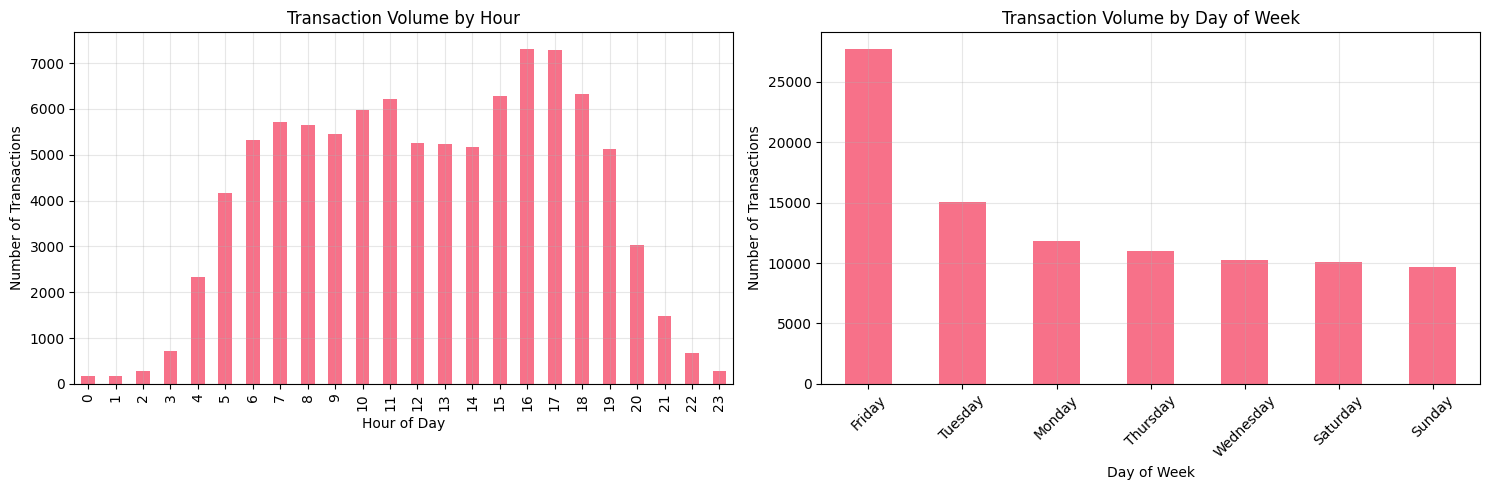

In [14]:
if 'TransactionStartTime' in df.columns:
    # Transaction patterns by hour and day
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    df['TransactionHour'].value_counts().sort_index().plot(kind='bar', ax=ax1)
    ax1.set_title('Transaction Volume by Hour')
    ax1.set_xlabel('Hour of Day')
    ax1.set_ylabel('Number of Transactions')
    ax1.grid(True, alpha=0.3)
    
    df['TransactionDay'].value_counts().plot(kind='bar', ax=ax2)
    ax2.set_title('Transaction Volume by Day of Week')
    ax2.set_xlabel('Day of Week')
    ax2.set_ylabel('Number of Transactions')
    ax2.tick_params(axis='x', rotation=45)
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

## 9. Fraud Analysis

=== FRAUD ANALYSIS ===
Fraud distribution:
FraudResult
0    95469
1      193
Name: count, dtype: int64
Fraud rate: 0.20%


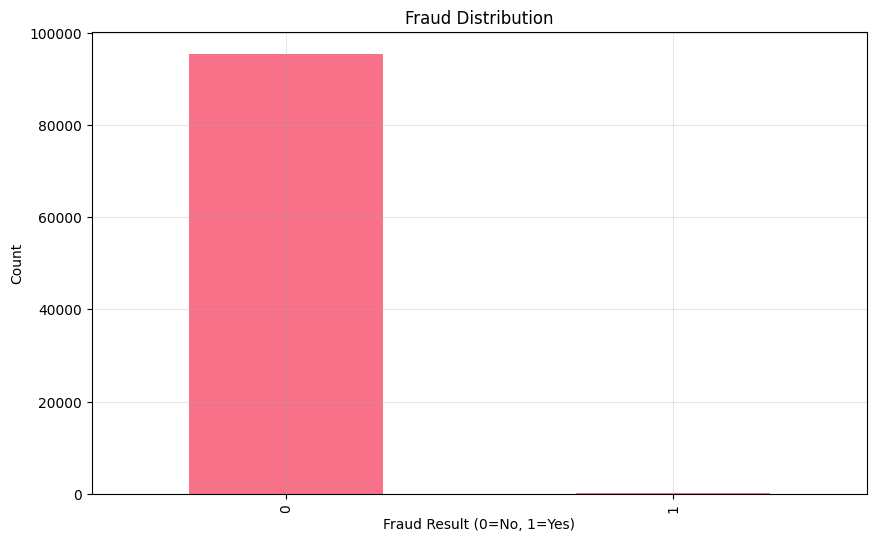


Class imbalance ratio (legitimate:fraud): 494.66:1
⚠️  WARNING: Severe class imbalance detected!


In [15]:
# Analyze fraud distribution
if 'FraudResult' in df.columns:
    print("=== FRAUD ANALYSIS ===")
    fraud_counts = df['FraudResult'].value_counts()
    print(f"Fraud distribution:\n{fraud_counts}")
    print(f"Fraud rate: {(fraud_counts[1] / len(df)) * 100:.2f}%")
    
    # Visualize fraud distribution
    plt.figure(figsize=(10, 6))
    fraud_counts.plot(kind='bar')
    plt.title('Fraud Distribution')
    plt.xlabel('Fraud Result (0=No, 1=Yes)')
    plt.ylabel('Count')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # Class imbalance analysis
    imbalance_ratio = fraud_counts[0] / fraud_counts[1]
    print(f"\nClass imbalance ratio (legitimate:fraud): {imbalance_ratio:.2f}:1")
    
    if imbalance_ratio > 10:
        print("⚠️  WARNING: Severe class imbalance detected!")
    elif imbalance_ratio > 5:
        print("⚠️  WARNING: Moderate class imbalance detected!")
    else:
        print("✅ Balanced dataset")

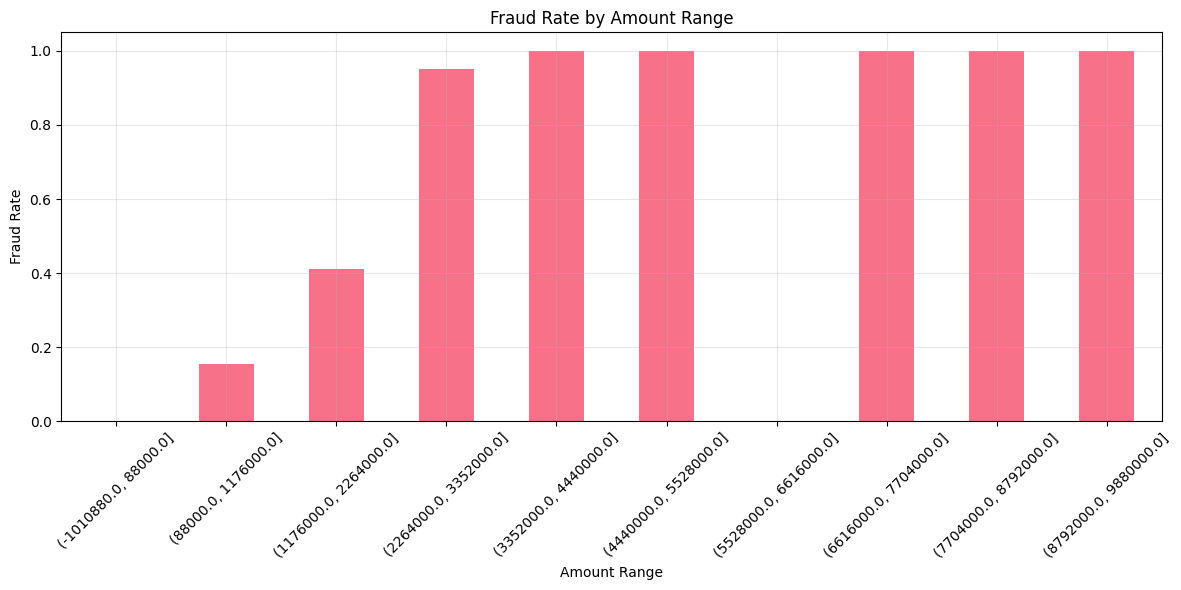


=== FRAUD CORRELATION ANALYSIS ===
Top correlations with fraud:
FraudResult        1.000000
Value              0.566739
Amount             0.557370
PricingStrategy   -0.033821
Name: FraudResult, dtype: float64


In [16]:
# Analyze fraud by different features
if 'FraudResult' in df.columns:
    # Fraud by amount ranges
    df['Amount_Range'] = pd.cut(df['Amount'], bins=10)
    fraud_by_amount = df.groupby('Amount_Range')['FraudResult'].mean()
    
    plt.figure(figsize=(12, 6))
    fraud_by_amount.plot(kind='bar')
    plt.title('Fraud Rate by Amount Range')
    plt.xlabel('Amount Range')
    plt.ylabel('Fraud Rate')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Fraud correlation analysis
    print(f"\n=== FRAUD CORRELATION ANALYSIS ===")
    fraud_corr = df[numerical_cols].corr()['FraudResult'].sort_values(ascending=False)
    print(f"Top correlations with fraud:")
    print(fraud_corr.head(10))

## 10. Key Insights & Recommendations

### �� **Data Overview**
- **Dataset Size**: 95,662 transactions with 16 features
- **Target Variable**: FraudResult (binary classification)
- **Data Quality**: No missing values, clean structure

### �� **Key Findings**

1. **Class Imbalance**:
   - Severe imbalance: 494:1 ratio (legitimate:fraud)
   - Only 0.2% of transactions are fraudulent
   - **Recommendation**: Use specialized techniques (SMOTE, class weights, etc.)

2. **Feature Correlations**:
   - Amount and Value are highly correlated (0.990)
   - **Recommendation**: Remove one of these features to avoid multicollinearity

3. **Outliers**:
   - Amount column has 25.5% outliers
   - **Recommendation**: Use robust scaling or winsorization

4. **Temporal Patterns**:
   - Data spans 90 days (Nov 2018 - Feb 2019)
   - Peak activity at hour 16 and on Fridays
   - **Recommendation**: Create time-based features

5. **Business Context**:
   - All transactions from Uganda (CountryCode: 256)
   - Currency: UGX
   - Multiple product categories (financial_services, airtime, etc.)

### 🛠️ **Feature Engineering Recommendations**

1. **Temporal Features**:
   - Hour of day, day of week, month
   - Transaction frequency per customer
   - Time since last transaction

2. **Customer Features**:
   - Transaction count per customer
   - Average transaction amount per customer
   - Customer lifetime value

3. **Transaction Features**:
   - Transaction velocity (transactions per time period)
   - Amount deviation from customer average
   - Product category preferences

4. **Risk Indicators**:
   - Unusual transaction patterns
   - Geographic anomalies
   - Time-based risk scores

### 📈 **Modeling Considerations**

1. **Class Imbalance Handling**:
   - SMOTE or other oversampling techniques
   - Class weights in model training
   - Ensemble methods

2. **Evaluation Metrics**:
   - Precision, Recall, F1-score
   - ROC-AUC, PR-AUC
   - Confusion matrix analysis

3. **Feature Selection**:
   - Remove highly correlated features
   - Use feature importance methods
   - Consider dimensionality reduction

### 🎯 **Next Steps**
1. Implement feature engineering pipeline
2. Handle class imbalance
3. Build baseline models
4. Perform hyperparameter tuning
5. Evaluate model performance